# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Data preparation

In [2]:
df_BCG = pd.read_csv('data_example/46488235.csv', delimiter=';')

In [3]:
print(df_BCG.shape)
df_BCG.head()

(11278, 174)


,TimeUtc,TimeSinceEpoch,Breath waveform,heart waveform1,heart waveform2,heart waveform3,heart waveform4,BCG,HR,BR,...,real.71,imag.71,Unnamed: 166,test1,test2,test3,test4,test5,LastPeak,Unnamed: 173
0,11:54:48,1689940488251,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11:54:48,1689940488266,0.005423,-0.003217,0.034222,0.0,0.0,-0.522221,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11:54:48,1689940488297,0.018787,-0.020914,0.142126,0.0,0.0,-0.218350,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11:54:48,1689940488297,0.032261,-0.047260,0.192599,0.0,0.0,0.788720,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11:54:48,1689940488313,0.046710,-0.014363,0.019121,0.0,0.0,-1.503740,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import csv
data = []
with open('data_example/HR_212130001219_2023-07-21_125235.txt', 'r') as file:
    lines = file.readlines()[1:]  

for line in lines:
    timestamp, value = line.strip().split('\t')
    data.append([timestamp, value.replace(',', '.')]) 

with open('data_example/HR.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Timestamp', 'HR [bpm]'])  
    csvwriter.writerows(data)
df_HR=pd.read_csv('data_example/HR.csv')

In [5]:
print(df_HR.shape)
df_HR.head()

(738, 2)


,Timestamp,HR [bpm]
0,1689940369177,141.509430
1,1689940369489,152.659088
2,1689940369937,149.500000
3,1689940370401,150.000000
4,1689940371118,141.666672


In [6]:
################# timestamp to utc
def timestamp_to_utc(timestamp_ms):
    # Convert milliseconds to seconds by dividing by 1000
    timestamp_seconds = int(timestamp_ms / 1000)
    utc_time = datetime.datetime.utcfromtimestamp(timestamp_seconds).time()
    return utc_time

In [7]:
df_BCG["TimeUtc"]=df_BCG["TimeSinceEpoch"].apply(lambda x : timestamp_to_utc(x) )
df_HR["TimeUtc"]=df_HR["Timestamp"].apply(lambda x : timestamp_to_utc(x) )

In [8]:
df_HR.head()

,Timestamp,HR [bpm],TimeUtc
0,1689940369177,141.509430,11:52:49
1,1689940369489,152.659088,11:52:49
2,1689940369937,149.500000,11:52:49
3,1689940370401,150.000000,11:52:50
4,1689940371118,141.666672,11:52:51


In [9]:
df_BCG.head()

,TimeUtc,TimeSinceEpoch,Breath waveform,heart waveform1,heart waveform2,heart waveform3,heart waveform4,BCG,HR,BR,...,real.71,imag.71,Unnamed: 166,test1,test2,test3,test4,test5,LastPeak,Unnamed: 173
0,11:54:48,1689940488251,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11:54:48,1689940488266,0.005423,-0.003217,0.034222,0.0,0.0,-0.522221,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11:54:48,1689940488297,0.018787,-0.020914,0.142126,0.0,0.0,-0.218350,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11:54:48,1689940488297,0.032261,-0.047260,0.192599,0.0,0.0,0.788720,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11:54:48,1689940488313,0.046710,-0.014363,0.019121,0.0,0.0,-1.503740,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
BCG_SIGNALS=df_BCG[["TimeUtc","BCG"]]
HR=df_HR[["TimeUtc","HR [bpm]"]]

In [11]:
grouped_BCG = pd.DataFrame(BCG_SIGNALS.groupby('TimeUtc')['BCG'].apply(np.array))
grouped_BCG['BCG_length']=grouped_BCG['BCG'].apply(lambda x : len(x))
grouped_BCG

,BCG,BCG_length
TimeUtc,,
11:54:48,"[0.0, -0.522221, -0.21835, 0.78872, -1.50374, ...",56
11:54:49,"[3.99454, 3.42489, 4.06056, 4.00052, 5.23884, ...",20
11:54:50,"[4.57494, 4.77091, 4.70003, 4.20737, 4.31733, ...",20
11:54:51,"[4.64839, 4.59175, 4.61841, 4.62981, 4.58214, ...",20
11:54:52,"[4.46927, 4.36694, 4.3549, 4.50874, 4.51077, 4...",20
...,...,...
12:04:06,"[200.643, 201.231, 201.205, 201.458, 201.324, ...",20
12:04:07,"[199.827, 200.812, 201.039, 201.784, 200.953, ...",20
12:04:08,"[210.988, 212.509, 210.785, 211.633, 210.914, ...",20


In [12]:
grouped_HR = pd.DataFrame(HR.groupby('TimeUtc')['HR [bpm]'].apply(lambda x: x.mean()))
grouped_HR

,HR [bpm]
TimeUtc,
11:52:49,147.889506
11:52:50,150.000000
11:52:51,141.666672
11:52:54,126.132530
11:52:56,114.189079
...,...
12:04:07,65.599998
12:04:08,65.300003
12:04:09,65.500000


In [13]:
DATA=grouped_BCG.merge(grouped_HR,left_index=True, right_index=True)
DATA

,BCG,BCG_length,HR [bpm]
TimeUtc,,,
11:54:48,"[0.0, -0.522221, -0.21835, 0.78872, -1.50374, ...",56,88.200001
11:54:49,"[3.99454, 3.42489, 4.06056, 4.00052, 5.23884, ...",20,88.900002
11:54:50,"[4.57494, 4.77091, 4.70003, 4.20737, 4.31733, ...",20,89.300003
11:54:51,"[4.64839, 4.59175, 4.61841, 4.62981, 4.58214, ...",20,89.500000
11:54:52,"[4.46927, 4.36694, 4.3549, 4.50874, 4.51077, 4...",20,89.700005
...,...,...,...
12:04:06,"[200.643, 201.231, 201.205, 201.458, 201.324, ...",20,66.200005
12:04:07,"[199.827, 200.812, 201.039, 201.784, 200.953, ...",20,65.599998
12:04:08,"[210.988, 212.509, 210.785, 211.633, 210.914, ...",20,65.300003


# BCG SIGNAL

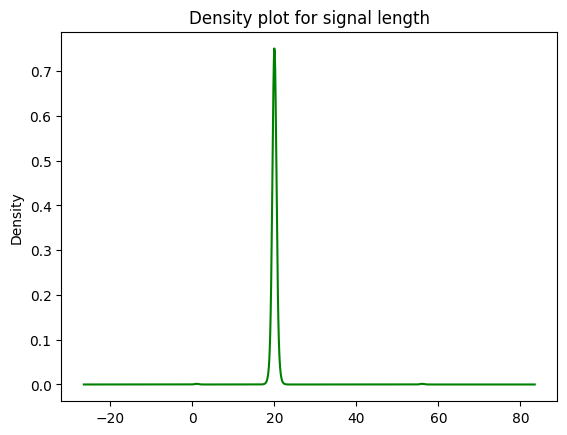

In [14]:
counts, bins = np.histogram(DATA["BCG_length"])
DATA.BCG_length.plot.density(color='green')
plt.title('Density plot for signal length')
plt.show()

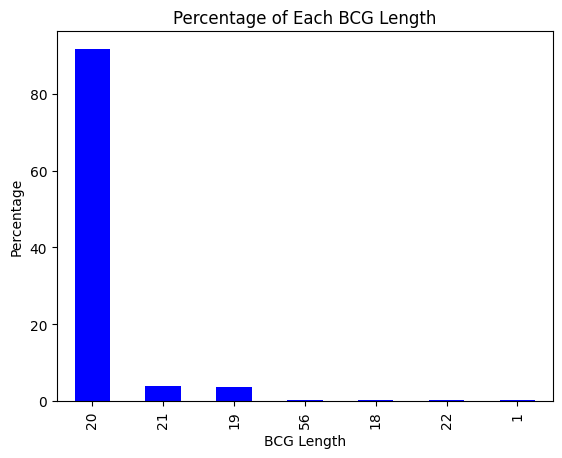

In [15]:
value_counts = DATA["BCG_length"].value_counts()
percentage_counts = (value_counts / len(DATA)) * 100
percentage_counts.plot(kind='bar', color='blue')
plt.title('Percentage of Each BCG Length')
plt.xlabel('BCG Length')
plt.ylabel('Percentage')
plt.show()

# HeartRate

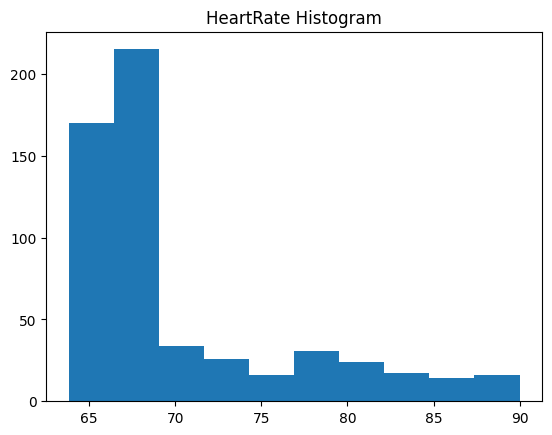

In [16]:
counts, bins = np.histogram(DATA["HR [bpm]"])
plt.hist(bins[:-1], bins, weights=counts)
plt.title('HeartRate Histogram')
plt.show()

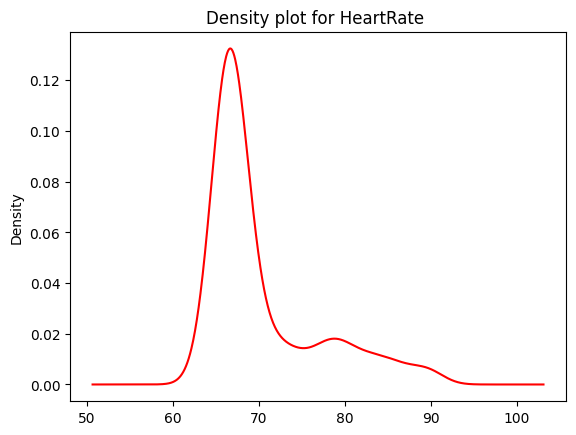

In [17]:
counts, bins = np.histogram(DATA["HR [bpm]"])
DATA["HR [bpm]"].plot.density(color='red')
plt.title('Density plot for HeartRate ')
plt.show()

# Final output

In [18]:
DATA=DATA[DATA["BCG_length"]==20.0]
DATA=DATA.drop('BCG_length',axis=1)
DATA.reset_index(inplace=True)
DATA.head()

,TimeUtc,BCG,HR [bpm]
0,11:54:49,"[3.99454, 3.42489, 4.06056, 4.00052, 5.23884, ...",88.900002
1,11:54:50,"[4.57494, 4.77091, 4.70003, 4.20737, 4.31733, ...",89.300003
2,11:54:51,"[4.64839, 4.59175, 4.61841, 4.62981, 4.58214, ...",89.500000
3,11:54:52,"[4.46927, 4.36694, 4.3549, 4.50874, 4.51077, 4...",89.700005
4,11:54:53,"[4.54745, 4.54191, 4.49756, 4.53599, 4.56124, ...",89.850003


In [19]:
##################3 making a commun save  format for the data
BCG=np.stack(np.array(DATA['BCG']))
BCG_amp=["BCG_amp"+str(i) for i in range(1,21)]
BCG_df=pd.DataFrame(BCG,columns=BCG_amp)
DATA=pd.concat([DATA,BCG_df],axis=1)
DATA=DATA[["TimeUtc"]+BCG_amp+["HR [bpm]"]]
DATA.head()

,TimeUtc,BCG_amp1,BCG_amp2,BCG_amp3,BCG_amp4,BCG_amp5,BCG_amp6,BCG_amp7,BCG_amp8,BCG_amp9,...,BCG_amp12,BCG_amp13,BCG_amp14,BCG_amp15,BCG_amp16,BCG_amp17,BCG_amp18,BCG_amp19,BCG_amp20,HR [bpm]
0,11:54:49,3.99454,3.42489,4.06056,4.00052,5.23884,4.49063,4.39598,4.26878,4.25956,...,4.68714,4.77099,4.43660,4.36950,4.34999,4.55135,4.52839,4.50787,4.46868,88.900002
1,11:54:50,4.57494,4.77091,4.70003,4.20737,4.31733,4.52882,4.42992,4.51607,4.63837,...,4.63263,4.64883,4.58312,4.50202,4.53510,4.60189,4.66868,4.67366,4.66601,89.300003
2,11:54:51,4.64839,4.59175,4.61841,4.62981,4.58214,4.58822,4.56969,4.66559,4.60531,...,4.27120,4.45971,4.54865,4.53974,4.56928,4.39675,4.29213,4.33070,4.42205,89.500000
3,11:54:52,4.46927,4.36694,4.35490,4.50874,4.51077,4.43044,4.33600,4.38575,4.50278,...,4.42699,4.41922,4.56929,4.56458,4.50728,4.48994,4.44295,4.51289,4.51962,89.700005
4,11:54:53,4.54745,4.54191,4.49756,4.53599,4.56124,4.55656,4.55625,4.50660,4.50660,...,4.41281,4.64937,4.96850,4.89032,4.08093,3.99427,3.61054,3.82461,3.52151,89.850003


# LOAD DATA

In [20]:
DATA = pd.DataFrame()

for i in range(1, 19):
    file_path = f"ALL_DATA\\file_{str(i)}.csv"
    df = pd.read_csv(file_path)
    DATA = pd.concat([DATA, df], axis=0)
DATA = DATA.reset_index(drop=True)

In [21]:
print(DATA.shape)
DATA.head()

(21406, 22)


,TimeUtc,BCG_amp1,BCG_amp2,BCG_amp3,BCG_amp4,BCG_amp5,BCG_amp6,BCG_amp7,BCG_amp8,BCG_amp9,...,BCG_amp12,BCG_amp13,BCG_amp14,BCG_amp15,BCG_amp16,BCG_amp17,BCG_amp18,BCG_amp19,BCG_amp20,HR [bpm]
0,11:42:04,-2.652580,-2.489090,-2.278890,-2.122180,-2.008680,-1.919910,-1.804830,-1.621570,-1.520460,...,-1.159820,-0.896336,-0.831622,-0.711250,-0.578813,-0.421784,-0.326547,-0.246919,-0.228377,62.000000
1,11:42:06,-0.137018,-0.322684,-0.455356,-0.609691,-0.805374,-0.998585,-1.188240,-1.387820,-1.599790,...,-2.317760,-2.474640,-2.541860,-2.510130,-2.478790,-2.478740,-2.529710,-2.643190,-2.732600,61.400002
2,11:42:07,-2.739600,-2.606480,-2.391740,-2.114240,-1.787080,-1.440520,-1.058780,-0.694904,-0.518889,...,-0.081459,0.168776,0.427557,0.723175,1.011310,1.235570,1.331310,1.350970,1.358450,61.400002
3,11:42:08,1.360710,1.350760,1.360040,1.393140,1.450170,1.476790,1.489790,1.552390,1.425370,...,1.114700,1.106290,1.004640,0.898717,0.754660,0.526176,0.170904,-0.224196,-0.626005,61.500000
4,11:42:09,-0.998725,-1.413390,-1.821630,-2.016300,-1.283410,1.045450,0.771265,-0.354194,-1.744560,...,1.852520,1.340170,3.110820,4.906250,5.536920,5.354790,5.722640,6.833130,8.008630,61.299999


In [22]:
DATA=DATA.drop(['TimeUtc'],axis=1)

In [23]:
DATA.to_csv('BCG_HearRate_DATA.csv',)

In [24]:
DATA

,BCG_amp1,BCG_amp2,BCG_amp3,BCG_amp4,BCG_amp5,BCG_amp6,BCG_amp7,BCG_amp8,BCG_amp9,BCG_amp10,...,BCG_amp12,BCG_amp13,BCG_amp14,BCG_amp15,BCG_amp16,BCG_amp17,BCG_amp18,BCG_amp19,BCG_amp20,HR [bpm]
0,-2.652580,-2.489090,-2.278890,-2.122180,-2.008680,-1.919910,-1.804830,-1.621570,-1.520460,-1.504480,...,-1.159820,-0.896336,-0.831622,-0.711250,-0.578813,-0.421784,-0.326547,-0.246919,-0.228377,62.000000
1,-0.137018,-0.322684,-0.455356,-0.609691,-0.805374,-0.998585,-1.188240,-1.387820,-1.599790,-1.875660,...,-2.317760,-2.474640,-2.541860,-2.510130,-2.478790,-2.478740,-2.529710,-2.643190,-2.732600,61.400002
2,-2.739600,-2.606480,-2.391740,-2.114240,-1.787080,-1.440520,-1.058780,-0.694904,-0.518889,-0.446542,...,-0.081459,0.168776,0.427557,0.723175,1.011310,1.235570,1.331310,1.350970,1.358450,61.400002
3,1.360710,1.350760,1.360040,1.393140,1.450170,1.476790,1.489790,1.552390,1.425370,1.149760,...,1.114700,1.106290,1.004640,0.898717,0.754660,0.526176,0.170904,-0.224196,-0.626005,61.500000
4,-0.998725,-1.413390,-1.821630,-2.016300,-1.283410,1.045450,0.771265,-0.354194,-1.744560,-0.182886,...,1.852520,1.340170,3.110820,4.906250,5.536920,5.354790,5.722640,6.833130,8.008630,61.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21401,0.455971,0.570250,0.357263,0.254170,0.550062,1.025150,1.036070,0.322538,-0.525630,-0.817108,...,0.013965,0.478837,0.570881,0.154803,-0.422321,-0.677590,-0.626633,-0.725872,-1.119410,63.200001
21402,-1.286280,-0.755447,0.196117,0.982337,1.439390,1.708990,1.731780,1.249940,0.282777,-0.622483,...,-0.538491,-0.280112,-0.483308,-0.873775,-0.979802,-0.704098,-0.327212,-0.092786,0.031709,63.550001
21403,0.187218,0.382639,0.508331,0.505776,0.434755,0.397374,0.433903,0.459146,0.313653,-0.038509,...,-0.585055,-0.486856,-0.173465,0.123537,0.137115,-0.002217,0.103056,0.389653,0.356230,64.000000
21404,-0.063602,-0.348142,-0.316180,-0.454555,-0.860815,-0.802315,0.015538,0.808802,0.853628,0.372849,...,0.090969,0.271145,0.224610,-0.014656,-0.112743,-0.051505,-0.176238,-0.385017,-0.292592,64.000000


In [25]:
# min max scaling
from sklearn.preprocessing import  MinMaxScaler,StandardScaler
scaler = StandardScaler()
DATA[BCG_amp]= scaler.fit_transform(DATA[BCG_amp])
DATA.head()

,BCG_amp1,BCG_amp2,BCG_amp3,BCG_amp4,BCG_amp5,BCG_amp6,BCG_amp7,BCG_amp8,BCG_amp9,BCG_amp10,...,BCG_amp12,BCG_amp13,BCG_amp14,BCG_amp15,BCG_amp16,BCG_amp17,BCG_amp18,BCG_amp19,BCG_amp20,HR [bpm]
0,-0.303694,-0.300884,-0.297101,-0.294215,-0.292229,-0.290675,-0.288767,-0.285546,-0.283807,-0.283462,...,-0.277484,-0.272805,-0.271686,-0.269634,-0.267400,-0.264566,-0.262951,-0.261517,-0.261266,62.000000
1,-0.259279,-0.262630,-0.264902,-0.267508,-0.270985,-0.274407,-0.277881,-0.281420,-0.285207,-0.290013,...,-0.297917,-0.300652,-0.301859,-0.301368,-0.300918,-0.300851,-0.301816,-0.303784,-0.305437,61.400002
2,-0.305230,-0.302957,-0.299094,-0.294075,-0.288316,-0.282210,-0.275596,-0.269188,-0.266129,-0.264792,...,-0.258455,-0.254013,-0.249471,-0.244329,-0.239348,-0.235330,-0.233705,-0.233333,-0.233276,61.400002
3,-0.232835,-0.233081,-0.232846,-0.232144,-0.231164,-0.230701,-0.230600,-0.229515,-0.231812,-0.236622,...,-0.237347,-0.237472,-0.239290,-0.241233,-0.243876,-0.247844,-0.254176,-0.261116,-0.268279,61.500000
4,-0.274493,-0.281889,-0.289027,-0.292345,-0.279424,-0.238317,-0.243286,-0.263173,-0.287762,-0.260139,...,-0.224328,-0.233345,-0.202131,-0.170536,-0.159510,-0.162667,-0.156240,-0.136636,-0.115977,61.299999


# LSTM model

In [26]:
def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][20]
    y.append(label)
  return np.array(X), np.array(y)

In [27]:
WINDOW_SIZE = 60
X, y = df_to_X_y(DATA, WINDOW_SIZE)
X.shape, y.shape

((21346, 60, 21), (21346,))

In [28]:
X_train, y_train = X[:15000], y[:15000]
X_val, y_val = X[15000:20000], y[15000:20000]
X_test, y_test = X[20000:], y[20000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((15000, 60, 21), (15000,), (5000, 60, 21), (5000,), (1346, 60, 21), (1346,))

# TensorFlow

In [29]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print("TensorFlow is using GPU:", tf.test.is_built_with_cuda())

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
TensorFlow is using GPU: True


In [30]:
import os
log_dir = os.path.join('Logs')
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [31]:
def lstm_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer((60, 21)))
    model.add(tf.keras.layers.LSTM(128, return_sequences=True))  
    model.add(tf.keras.layers.LSTM(64, return_sequences=True))   
    model.add(tf.keras.layers.LSTM(32))
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='relu')) 
    return model

In [32]:
MODEL=lstm_model()

In [33]:
MODEL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           76800     
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 138,897
Trainable params: 138,897
Non-trainable params: 0
_________________________________________________________________


In [34]:
MODEL.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [35]:
history=MODEL.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30,batch_size=32, callbacks=[tb_callback])

Epoch 1/30
469/469 [==============================] - 26s 36ms/step - loss: 4620.0771 - root_mean_squared_error: 67.9711 - val_loss: 3761.6104 - val_root_mean_squared_error: 61.3320
Epoch 2/30
469/469 [==============================] - 16s 34ms/step - loss: 4031.3921 - root_mean_squared_error: 63.4932 - val_loss: 3287.2576 - val_root_mean_squared_error: 57.3346
Epoch 3/30
469/469 [==============================] - 15s 33ms/step - loss: 3513.3293 - root_mean_squared_error: 59.2733 - val_loss: 2780.4536 - val_root_mean_squared_error: 52.7300
Epoch 4/30
469/469 [==============================] - 16s 34ms/step - loss: 2964.1799 - root_mean_squared_error: 54.4443 - val_loss: 2257.7571 - val_root_mean_squared_error: 47.5159
Epoch 5/30
469/469 [==============================] - 17s 35ms/step - loss: 2410.3943 - root_mean_squared_error: 49.0958 - val_loss: 1749.1986 - val_root_mean_squared_error: 41.8234
Epoch 6/30
469/469 [==============================] - 18s 38ms/step - loss: 1882.0364 - ro

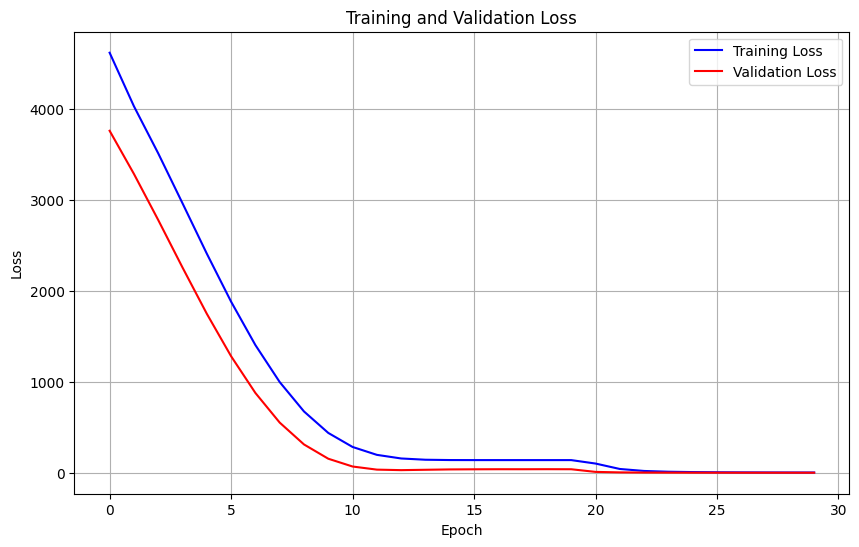

In [36]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions(model, X, y, start=0, end=100):
    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions': predictions, 'Actuals': y})
    plt.plot(df['Predictions'][start:end], label='Predictions')
    plt.plot(df['Actuals'][start:end], label='Actuals')
    plt.legend()  
    return df, mse(y, predictions)

469/469 [==============================] - 7s 13ms/step


(       Predictions    Actuals
 0        61.813381  62.200001
 1        62.042805  62.400002
 2        62.274380  62.100002
 3        62.084091  62.100002
 4        61.982075  61.900002
 ...            ...        ...
 14995    65.552193  67.950001
 14996    68.195824  68.200005
 14997    68.759933  67.800003
 14998    67.511940  65.800003
 14999    65.136589  65.099998
 
 [15000 rows x 2 columns],
 3.033796698952559)

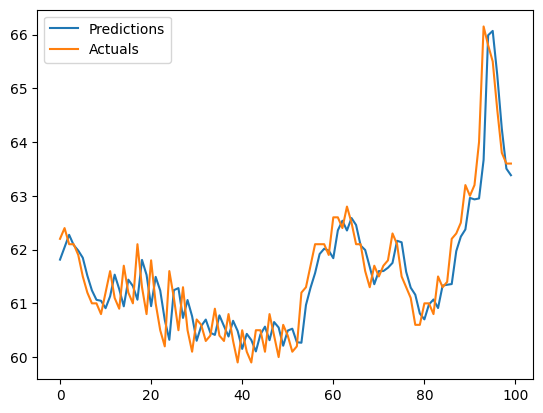

In [38]:
plot_predictions(MODEL, X_train, y_train)

157/157 [==============================] - 2s 13ms/step


(      Predictions    Actuals
 0       64.292091  64.300003
 1       64.002640  64.200005
 2       64.079491  65.200005
 3       65.089493  64.900002
 4       65.055847  63.900002
 ...           ...        ...
 4995    72.042114  72.099998
 4996    72.526138  72.200005
 4997    71.890022  72.300003
 4998    71.529411  72.050004
 4999    71.383575  71.500000
 
 [5000 rows x 2 columns],
 0.9492432423562833)

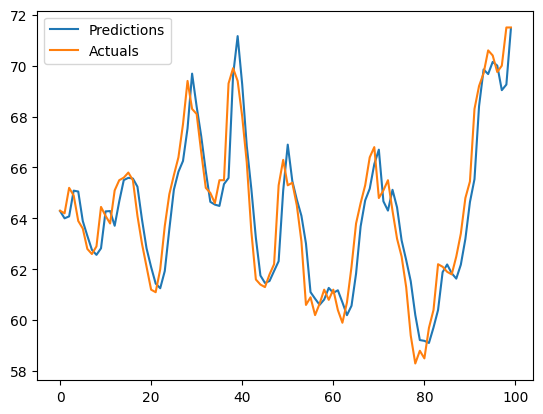

In [39]:
plot_predictions(MODEL, X_val, y_val)

43/43 [==============================] - 1s 15ms/step


(      Predictions    Actuals
 0       70.882805  71.400002
 1       70.714981  72.099998
 2       71.838425  74.150002
 3       74.725220  75.200005
 4       76.061691  74.000000
 ...           ...        ...
 1341    63.296471  63.200001
 1342    63.093216  63.550001
 1343    63.409702  64.000000
 1344    63.937340  64.000000
 1345    63.999107  64.000000
 
 [1346 rows x 2 columns],
 1.0156975551712977)

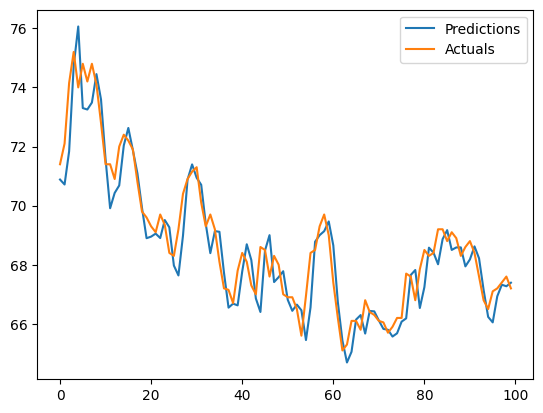

In [40]:
plot_predictions(MODEL, X_test, y_test)

In [41]:
MODEL.save('lstm_model.h5')